In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    print(os.path.join(str(dirname), str(filenames)))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/")

['Uninfected', 'Parasitized']

In [3]:
len(os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/"))

13780

In [4]:
len(os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/"))

13780

In [5]:
root_dir = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/"
uninfected_dir = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/"
infected_dir = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/"

uninfected = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/")
infected = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/")

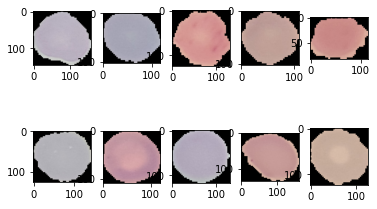

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 5)
for i, ax in enumerate(axes.flat): 
    ax.imshow(mpimg.imread(uninfected_dir + uninfected[i]))

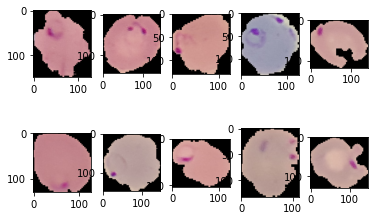

In [7]:
fig, axes = plt.subplots(2, 5)
for i, ax in enumerate(axes.flat):
    ax.imshow(mpimg.imread(infected_dir + infected[i]))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_shape = (128, 128)

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# preparing train Image Generator
trainDatagen = datagen.flow_from_directory(directory = root_dir,
                                           target_size = image_shape,
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset ='training')

# preparing validation Image Generator
valDatagen = datagen.flow_from_directory(directory = root_dir,
                                           target_size= image_shape,
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset ='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# build the model
model = Sequential([
                    Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
                    MaxPool2D(2,2),
                    Dropout(0.2),
                    Conv2D(32,(3,3),activation='relu'),
                    MaxPool2D(2,2),
                    Dropout(0.3),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPool2D(2,2),
                    Dropout(0.3),
                    Flatten(),
                    Dense(64,activation='relu'),
                    Dropout(0.5),
                    Dense(1,activation='sigmoid')])

In [11]:
"""model = Sequential([
                    Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
                    MaxPool2D(2,2),
                    Flatten(),
                    Dense(1,activation='sigmoid')])"""

"model = Sequential([\n                    Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),\n                    MaxPool2D(2,2),\n                    Flatten(),\n                    Dense(1,activation='sigmoid')])"

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [15]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                             epochs = 20,
                             validation_data = valDatagen,
                             validation_steps = len(valDatagen),
                             callbacks = [early_stopping])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1378/1378 [==============================] - 256s 185ms/step - loss: 0.5133 - accuracy: 0.7414 - val_loss: 0.1908 - val_accuracy: 0.9332
Epoch 2/20
1378/1378 [==============================] - 214s 155ms/step - loss: 0.1883 - accuracy: 0.9408 - val_loss: 0.1605 - val_accuracy: 0.9396
Epoch 3/20
1378/1378 [==============================] - 211s 153ms/step - loss: 0.1686 - accuracy: 0.9482 - val_loss: 0.1782 - val_accuracy: 0.9350
Epoch 4/20
1378/1378 [==============================] - 210s 152ms/step - loss: 0.1473 - accuracy: 0.9547 - val_loss: 0.1734 - val_accuracy: 0.9372
Epoch 5/20
1378/1378 [==============================] - 212s 154ms/step - loss: 0.1440 - accuracy: 0.9546 - val_loss: 0.1747 - val_accuracy: 0.9377
Epoch 6/20
1378/1378 [==============================] - 214s 155ms/step - loss: 0.1374 - accuracy: 0.9569 - val_loss: 0.1712 - val_accuracy: 0.9414
Epoch 7/20
1378/1378 [==============================] - 217s 157ms/step - loss: 0.1231 - accuracy: 0.9593 - val_

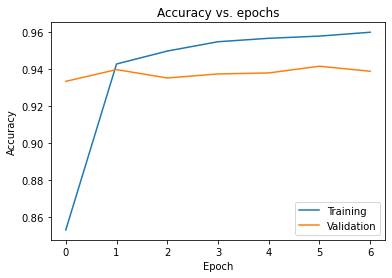

In [16]:
# Run this cell to plot the epoch vs accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show() 

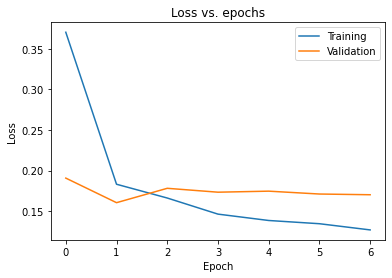

In [17]:
#Run this cell to plot the epoch vs loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show() 